# Эффект Поккельса

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
from scipy.stats import linregress
import pint
import cv2

u = pint.UnitRegistry()

In [117]:
def amp_envelope(signal, frame_size, hop_length):
    time = np.arange(0, signal.shape[0], hop_length)
    envelope = np.array([max(signal[i:i+frame_size]) for i in time])
    return time, envelope

### Эксперимент 1 - радиусы колец

##### Попытка в обработку изображений

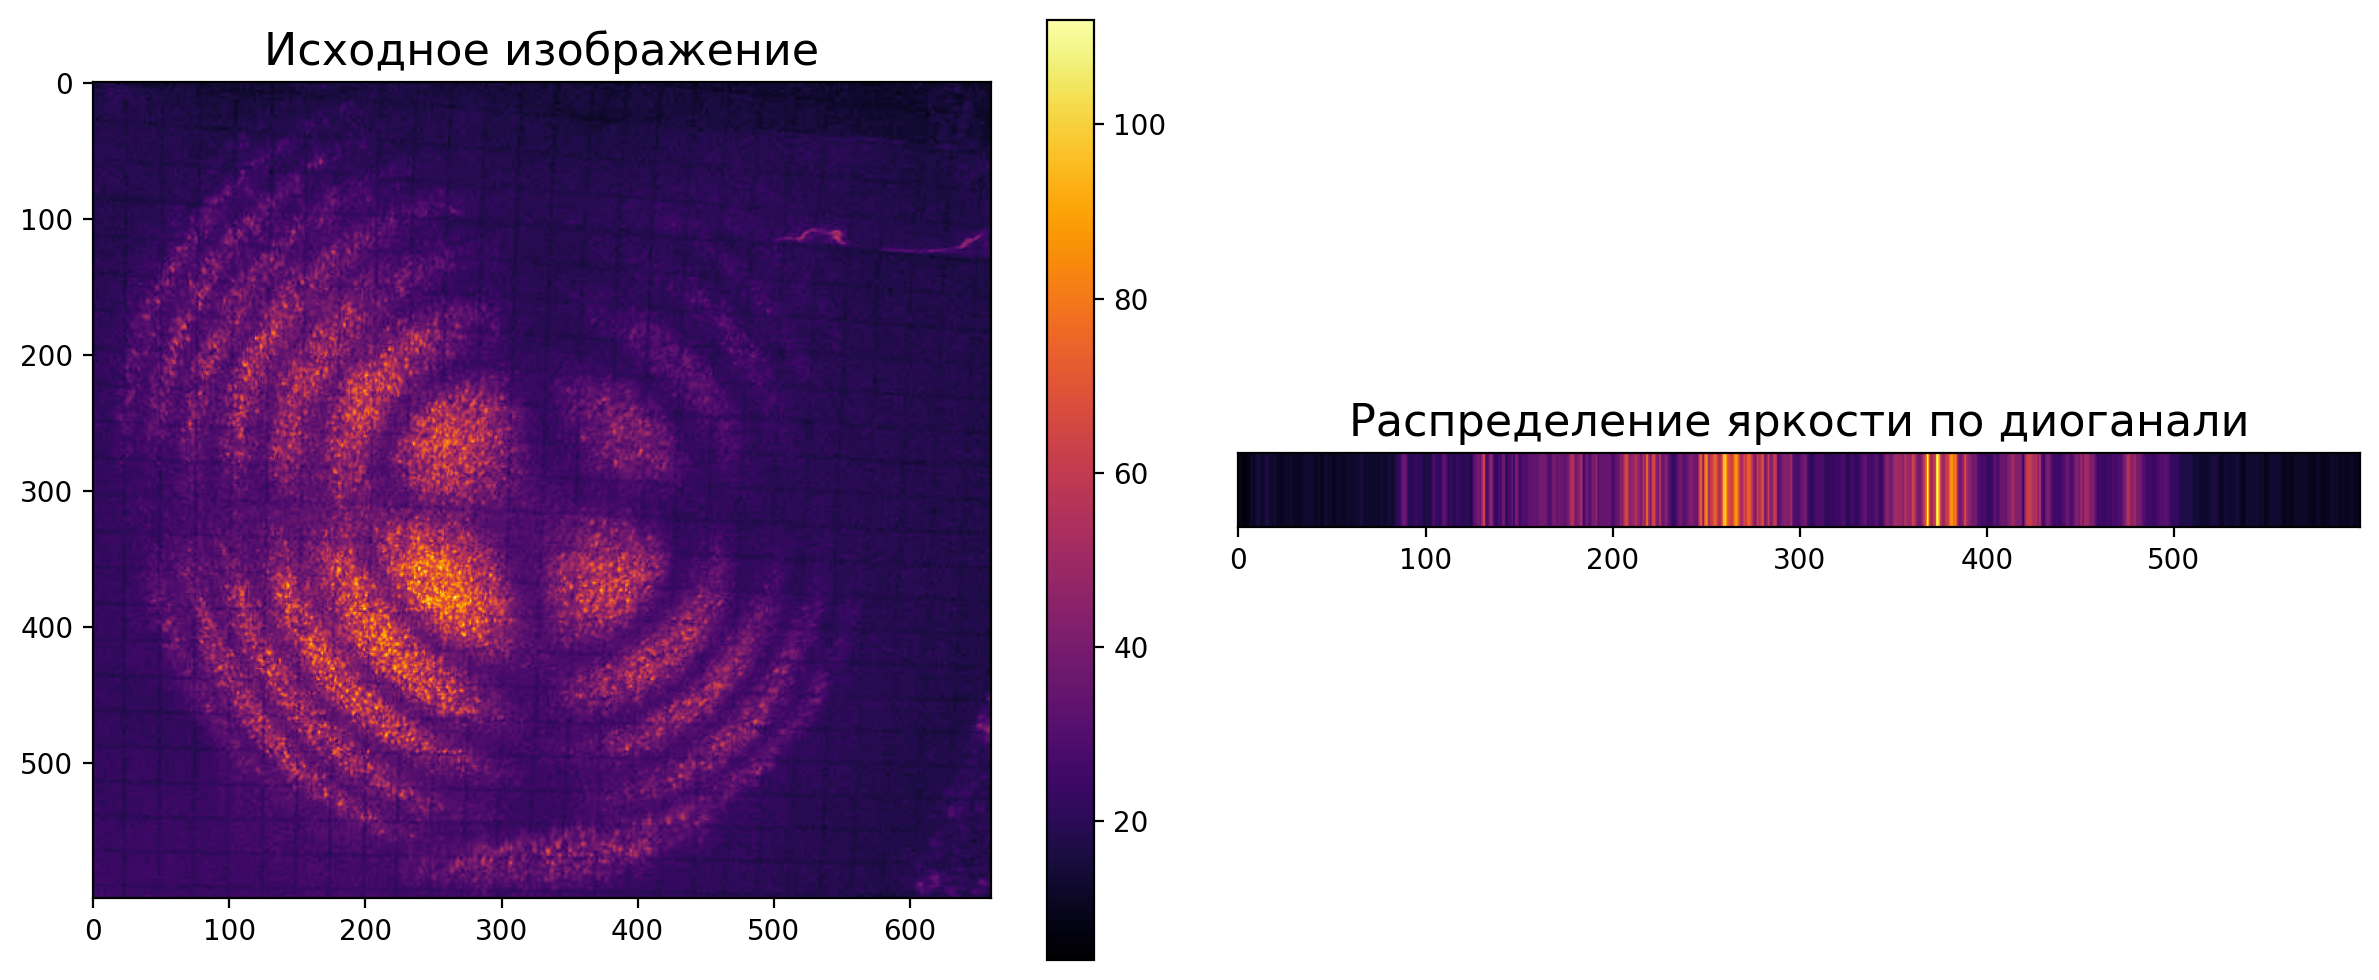

In [187]:
fig, ax = plt.subplots(1, 2, figsize =(12, 5), dpi = 200)

img_70 = cv2.imread('img_70/L70_1.jpg', 0)[0:600, 300:]
im = ax[0].imshow(img_70, cmap = 'inferno')
ax[0].set_title("Исходное изображение", fontsize = 16)
plt.colorbar(im, ax = ax[0]);
diagonal_img = np.vstack([img_70.diagonal() for _ in range(40)])
ax[1].imshow(diagonal_img, cmap = 'inferno')
ax[1].set_title("Распределение яркости по диоганали", fontsize = 16)
ax[1].set_yticks([])
fig.tight_layout()

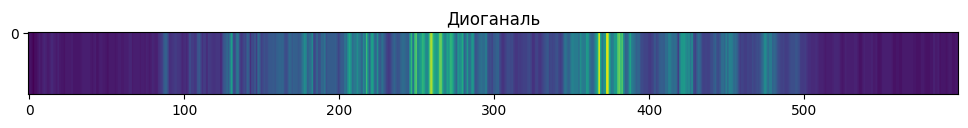

In [38]:
plt.figure(figsize = (12, 3))
diagonal_img = np.vstack([img_70.diagonal() for _ in range(40)])
plt.yticks([0])
plt.imshow(diagonal_img)
plt.title("Диоганаль");

In [139]:
time_70, amp_70 = amp_envelope(img_70.diagonal(), 10, 10)
interp_f = interp1d(time_70, amp_70, kind = 'quadratic')
time_70_interp = np.linspace(min(time_70), max(time_70), 1000)

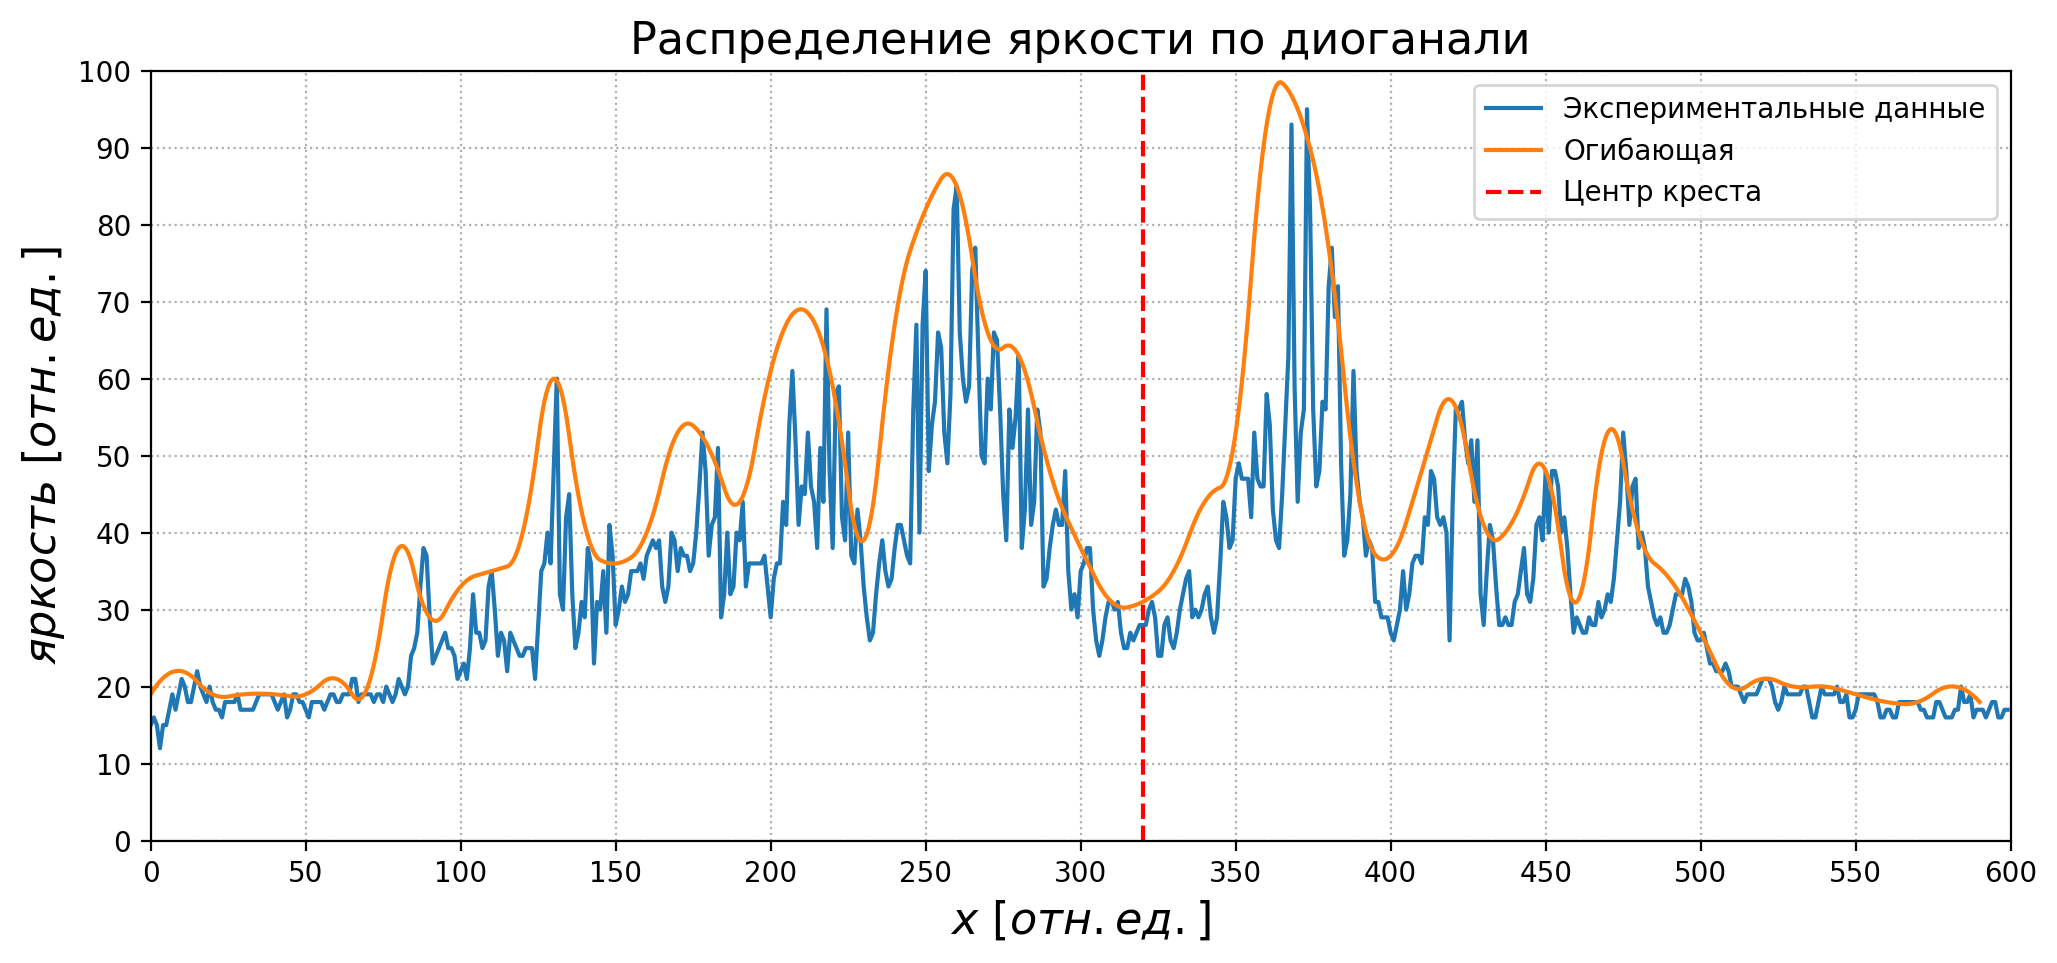

In [188]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(img_70.diagonal(), label = 'Экспериментальные данные')
plt.plot(time_70_interp, interp_f(time_70_interp), label = 'Огибающая')
plt.xlim(0, 600)
plt.ylim(0, 100)
plt.grid(ls = ':')
plt.axvline(320, linestyle = '--', color = 'red', label = 'Центр креста')
plt.xticks(np.arange(0, 650, 50))
plt.yticks(np.arange(0, 110, 10))
plt.title("Распределение яркости по диоганали", 
          fontsize = 16)
plt.legend()

plt.xlabel("$x \ [отн. ед.]$", fontsize = 16)
plt.ylabel("$яркость \ [отн. ед.]$", fontsize = 16);

##### Радиусы колец при $L = 76 \ см$

In [166]:
r = np.array([2.7, 3.7, 4.9, 5.6, 6.3, 7.1, 7.5])
r_sq = np.power(r, 2)
m = np.arange(len(r)) + 1

In [196]:
MNK = linregress(m, r_sq)

alpha_error = 0.2

m_line = np.linspace(0, 8, 1000)
r_sq_line = MNK.slope * m_line + MNK.intercept
r_sq_line_down = (MNK.slope - alpha_error) * m_line + MNK.intercept
r_sq_line_up = (MNK.slope + alpha_error) * m_line + MNK.intercept

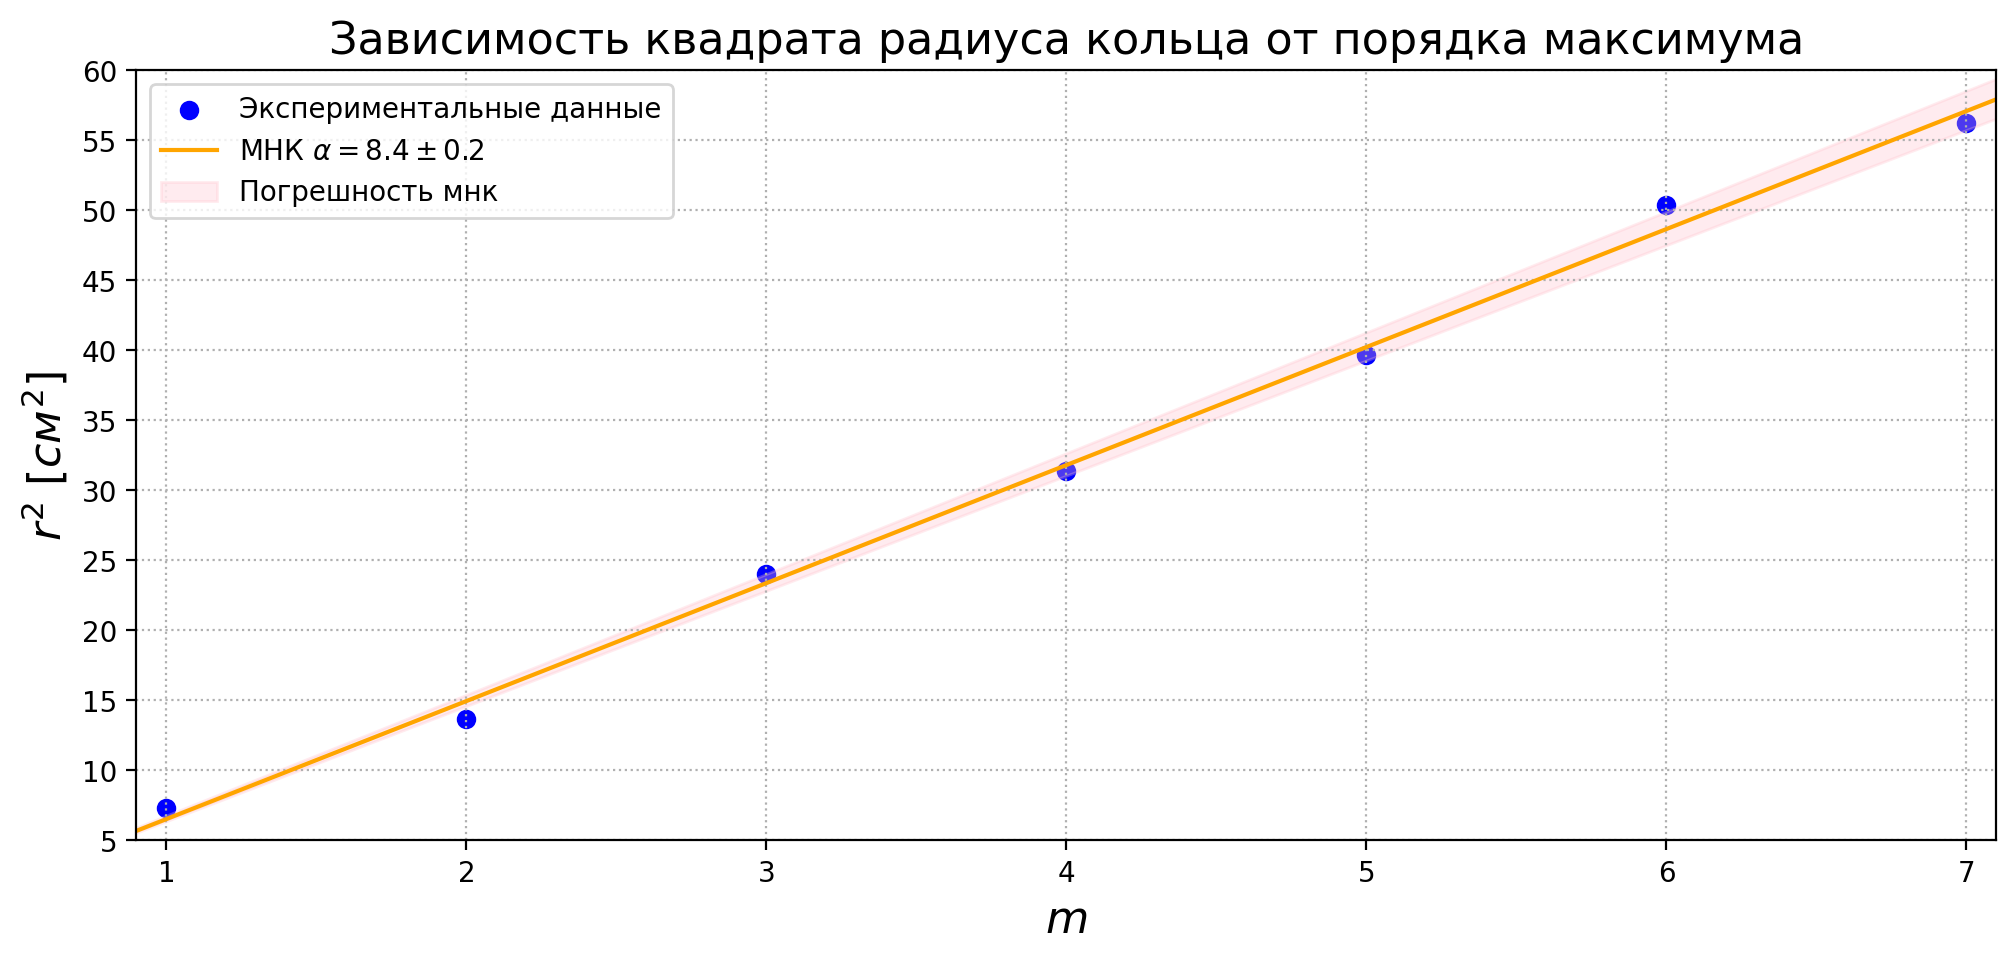

In [199]:
plt.figure(figsize = (12, 5), dpi = 200)


plt.scatter(m, 
            r_sq, 
            label = 'Экспериментальные данные',
            color = 'blue')
plt.plot(m_line,
         r_sq_line,
         label = r'МНК $\alpha = {} \pm {}$'.format(round(MNK.slope, 1), alpha_error),
         color = 'orange')
plt.fill_between(x = m_line, 
                 y1 = r_sq_line_down, 
                 y2 =r_sq_line_up, 
                 alpha = 0.3, 
                 color = 'pink',
                 label = 'Погрешность мнк')

plt.ylim(5, 60)
plt.xlim(0.9, 7.1)
plt.yticks(np.arange(5, 65, 5))
plt.xticks(m)
plt.grid(ls = ':')

plt.legend(loc = 'upper left')
plt.xlabel("$m$", fontsize = 16)
plt.ylabel(r"$r^{2} \ [см^{2}]$", fontsize = 16)
plt.title("Зависимость квадрата радиуса кольца от порядка максимума", fontsize = 16);